In [104]:
import pandas as pd
from binance.client import Client
from datetime import datetime, timedelta
import time

# Binance API anahtarlarınızı burada tanımlayın
api_key = 'hJmrpmh9tnr0VjDHT9I7ABZhMgIb8ncY45X1nB3p4jat8xqID5AwoSII4axasKZD'
api_secret = 'Z2TgzJbqPXjrJWSz7TKcvq4JKKnOswSPM5yY0RCURCCuMRtlVir8OpPnwNcFJ6dv'

# Binance Client'ı oluşturun
client = Client(api_key, api_secret)

symbol = "BTCUSDT"
start_date = "2023-03-01"
end_date = "2023-09-01"
interval = Client.KLINE_INTERVAL_15MINUTE

# Veriyi saklamak için bir liste oluşturun
data = []
limit = 10000  # Her bir istekte çekilecek maksimum veri sayısı
request_weight = 0  # İstek ağırlığı

# Başlangıç ve bitiş tarihlerini datetime formatına çevirin
start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d")

# İstekler aracılığıyla veriyi çekin
while start_datetime < end_datetime and request_weight < 1200:
    klines = client.get_historical_klines(symbol=symbol, interval=interval, start_str=start_datetime.strftime("%Y-%m-%d %H:%M:%S"), end_str=end_datetime.strftime("%Y-%m-%d %H:%M:%S"))
    if not klines:
        break
    data.extend(klines)
    
    # İstek ağırlığını güncelle (her bir istek 1 ağırlık)
    request_weight += 1
    
    # Bir sonraki isteği yapmadan önce başlangıç zamanını güncelle
    start_datetime = datetime.utcfromtimestamp(klines[-1][0] / 1000) + timedelta(seconds=1)

    # API sınırlamalarını göz önünde bulundurarak bekleyin (gerekirse)
    if request_weight >= 1190:
        time.sleep(60)  # 60 saniye bekleyin (1 dakika)

# DataFrame'i oluşturun
df = pd.DataFrame(data, columns=["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"])

# Zaman sütununu datetime olarak dönüştürün
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Diğer sayısal verileri floata dönüştürün
df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']] = df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']].astype(float)


In [105]:
df

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,2676.35187,1677629699999,6.195313e+07,106496,1359.29723,3.146608e+07,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,2327.36073,1677630599999,5.396533e+07,85498,1186.44460,2.751063e+07,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,2304.89283,1677631499999,5.343452e+07,90021,1067.83235,2.475616e+07,0
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,5428.34375,1677632399999,1.252558e+08,148178,2705.62578,6.242877e+07,0
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,3068.10426,1677633299999,7.093708e+07,105631,1591.94490,3.680739e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09,194.11965,1693523699999,5.052239e+06,5153,79.30930,2.064098e+06,0
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11,251.29895,1693524599999,6.530555e+06,6013,79.10420,2.055704e+06,0
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24,245.21169,1693525499999,6.367552e+06,5116,126.90147,3.295108e+06,0
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78,366.66576,1693526399999,9.512836e+06,7511,174.14839,4.518030e+06,0


In [106]:
import pandas as pd
from datetime import datetime, timedelta

# For example, start and end dates
start_date = "2023-03-01"
end_date = "2023-09-01"

# Time interval: 15 minutes (900 seconds)
interval_seconds = 900

# Convert start and end dates to datetime objects
start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d")

# Calculate the expected number of data points
expected_data_points = int((end_datetime - start_datetime).total_seconds() / interval_seconds) + 1

# Real data points (rows): Let's assume it's the number of rows in your DataFrame named 'df'
# Replace 'df' with the name of your actual DataFrame
real_data_points = len(df)

# Compare expected and real data points
if expected_data_points == real_data_points:
    print("The time series has no gaps or irregularities.")
    print(f"Expected data points: {expected_data_points}")
    print(f"Real data points: {real_data_points}")
else:
    print("There are gaps or irregularities in the time series.")
    print(f"Expected data points: {expected_data_points}")
    print(f"Real data points: {real_data_points}")

There are gaps or irregularities in the time series.
Expected data points: 17665
Real data points: 17660


In [107]:
# DataFrame'e dönüştürün
df = pd.DataFrame(data, columns=[
    "timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", 
    "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])

# Zaman sütununu datetime olarak dönüştürün
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Diğer sayısal verileri floata dönüştürün
df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']] = df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']].astype(float)

# İstenen sütunları seçin
selected_columns = ["timestamp", "open", "high", "low", "close"]

df = df[selected_columns]

df

,timestamp,open,high,low,close
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84
...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78


In [108]:
df.dtypes

timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
dtype: object

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,17660.0,27829.173008,2252.760942,19622.77,26709.4125,28021.955,29451.1725,31672.95
high,17660.0,27865.525972,2250.049671,19687.73,26741.9100,28062.940,29473.7900,31804.20
low,17660.0,27790.953696,2254.880951,19549.09,26670.0225,27978.460,29431.5300,31632.00
close,17660.0,27829.335063,2252.526590,19621.66,26709.4100,28021.955,29451.1775,31672.95


In [110]:
print('If we are going to use close column for model traning, model is going to be worked better as long as price is between {:.0f}/{:.0f}'.format(df.low.min(), df.high.max()))

If we are going to use close column for model traning, model is going to be worked better as long as price is between 19549/31804


## Project Steps

### 1. Describe the problem

The purpose is producing **bull/bear signal**, so out target column must be that.

**Bull Signal:** _If a purchase increases by 1% without decreasing by 0.5% from where we bought it in subsequent time frames, it is a bull signal for that time frame._

**Bear Signal:** _If a purchase decrases 1% without increasing by 0.5% from where we bought it in subsequent time frames, it is a bear signal for that time frame._


In [111]:
df

,timestamp,open,high,low,close
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84
...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78


In [112]:
def perc_check_more(x):
    return (x + (x * 0.0025)) 
def perc_confirmed_more(x):
    return (x + (x * 0.005))

def perc_check_less(x):
    return (x - (x * 0.0025)) 
def perc_confirmed_less(x):
    return (x - (x * 0.005)) 

df['Sell'] = 0
df['Stable'] = 0
df['Buy'] = 0

In [113]:
df

,timestamp,open,high,low,close,Sell,Stable,Buy
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,0,0,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,0,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,0
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,0
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,0
...,...,...,...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09,0,0,0
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11,0,0,0
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24,0,0,0
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78,0,0,0


In [114]:
for ci in range(df.shape[0]):
    try: 
        more_check = perc_check_more(df.iloc[ci, 4]) 
        more_confirmed = perc_confirmed_more(df.iloc[ci, 4]) 
        
        less_check = perc_check_less(df.iloc[ci, 4])
        less_confirmed = perc_confirmed_less(df.iloc[ci, 4])

        # print('Close itself: ', df.iloc[ci, 4])
        # print('Less 0.005: ', less0005)
        # print('More 0.005: ', more0005)

        try: 
            for fci in range(ci+1, df.shape[0]-15):
                # check = True
                # print(f'Step: {step}' )
                # print('df.iloc[fci, 4]: ', df.iloc[fci, 4])

                if df.iloc[fci, 4] < less_check: 
                    # print(df.iloc[fci, 4])
                    # print('hey df.iloc[fci, 4] < less0005')
                    try:
                        for lessfci in range(fci+1, fci+15):
                            if df.iloc[lessfci, 4] < less_confirmed: 
                                df.iloc[ci, 5] = 1 #bear
                                # check = False
                                break
                            elif df.iloc[lessfci, 4] > df.iloc[ci, 4]: 
                                df.iloc[ci, 6] = 1 #volatile
                                # check = False
                                break   
                        # if check: df.iloc[ci, 6] = 1 #volitile
                        break

                    except IndexError: 
                        print(f'\nci: {ci}\n THIRTH LOOP (lessfci): Index Error')
                        break

                if df.iloc[fci, 4] > more_check:
                    # print('hey df.iloc[fci, 4] < more0005') 
                    try:
                        for morefci in range(fci+1, fci+15):
                            if df.iloc[morefci, 4] > more_confirmed: 
                                df.iloc[ci, 7] = 1 #bull
                                # check = False
                                break
                            elif df.iloc[morefci, 4] < df.iloc[ci, 4]: 
                                df.iloc[ci, 6] = 1 #volatile
                                # check = False
                                break 

                        # if check: df.iloc[ci, 6] = 1 #volitile
                        break
                    
                    except IndexError:
                        print(f'\nci: {ci}\nfci: {fci}\ndf.shape[0]: {df.shape[0]}\nTHIRTH LOOP (more00025): Index Error')
                        break

        except IndexError: 
            print(f'\nci: {ci}\n SEC LOOP (fci): Index Error')
            break

    except IndexError: 
        print(f'\nci: {ci}\n FIRST LOOP (ci): Index Error')
        break


In [115]:
df[['Buy', 'Stable', 'Sell']].value_counts()

Buy  Stable  Sell
0    1       0       5786
     0       1       4635
1    0       0       4577
0    0       0       2662
dtype: int64

**00025/0005/15**

![Alt text](image-5.png)

In [116]:
df.head(5)

,timestamp,open,high,low,close,Sell,Stable,Buy
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,0,1,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,1,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,1
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,1
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,1


In [117]:
# df = df[~((df['Sell'] == 0) & (df['Stable'] == 0) & (df['Buy'] == 0))] 
# 32 data removed for 00025/0005 labelling

In [118]:
df.iloc[15:25,:]

,timestamp,open,high,low,close,Sell,Stable,Buy
15,2023-03-01 03:45:00,23473.64,23488.00,23403.67,23441.14,0,0,1
16,2023-03-01 04:00:00,23440.37,23456.50,23425.44,23431.39,0,0,1
17,2023-03-01 04:15:00,23430.69,23485.43,23428.88,23468.05,0,0,1
18,2023-03-01 04:30:00,23468.05,23529.97,23466.57,23491.64,0,0,1
19,2023-03-01 04:45:00,23492.12,23847.00,23490.56,23794.48,0,0,0
20,2023-03-01 05:00:00,23794.48,23821.56,23727.79,23733.55,0,0,1
21,2023-03-01 05:15:00,23734.91,23762.50,23646.16,23682.34,0,0,1
22,2023-03-01 05:30:00,23682.34,23725.72,23631.97,23682.98,0,0,1
23,2023-03-01 05:45:00,23682.99,23705.60,23652.42,23694.17,0,0,1
24,2023-03-01 06:00:00,23695.14,23746.55,23666.00,23706.07,0,0,1


In [119]:
df['In/Out'] = 0

i = 0
while i<len(df):
    if df.iloc[i, -2] == 1: 
        while ((df.iloc[i, -2] == 1) | (df.iloc[i, -3] == 1)) & (i<len(df)): 
            df.iloc[i, -1] = 1
            i += 1  
            print(i)

    if ((df.iloc[i, -4] == 1) | (df.iloc[i, -3] == 1)): 
        i += 1
        print(i)
        

    else: i += 1


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
104
105
106
107
115
116
119
120
121
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
206
207
210
212
213
215
217
218
219
220
221
222
223
224
225
226
227
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
280
281
282
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
302
303
304
305
30

In [120]:
df['change'] = None

for i in range(1, len(df)):
    close = df.iloc[i, 4]
    previous_close = df.iloc[i-1, 4]

    change = close - previous_close
    change_percentage = change * 100 / close
    df.loc[i,'change'] = change_percentage

df = df.iloc[1:,:]

In [121]:
df.reset_index(drop=True, inplace=True)

In [122]:
df.head()

,timestamp,open,high,low,close,Sell,Stable,Buy,In/Out,change
0,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,1,0,0,0.044109
1,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,1,1,-0.106457
2,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,1,1,-0.192589
3,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,1,1,0.271285
4,2023-03-01 01:15:00,23164.40,23169.10,23123.01,23152.02,0,0,1,1,-0.051054


In [123]:
def test_investment():
    label_df = pd.DataFrame(data = 0, index=range(len(df)), columns=['in/out', 'change', 'investment'])

    for i in range(len(df)):
        if df.iloc[i, -2] == 1:
            label_df.iloc[i, 0] = 1

    label_df.iloc[:, 2] = 100

    for i in range(len(df)):
        label_df.loc[i, 'change'] = df.loc[i, 'change']
    
    for i in range(0, len(label_df)-1):
        if label_df.loc[i, 'in/out'] == 1:
            label_df.loc[i+1, 'investment'] = (label_df.loc[i, 'investment'] * label_df.loc[i+1, 'change'] / 100) + label_df.loc[i, 'investment'] #inside

        else: label_df.loc[i+1, 'investment'] = label_df.loc[i, 'investment'] #not inside
    
    investment_profit = int(label_df.iloc[-1, -1] - label_df.iloc[0, -1])


    return investment_profit

In [124]:
df

,timestamp,open,high,low,close,Sell,Stable,Buy,In/Out,change
0,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,1,0,0,0.044109
1,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,1,1,-0.106457
2,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,1,1,-0.192589
3,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,1,1,0.271285
4,2023-03-01 01:15:00,23164.40,23169.10,23123.01,23152.02,0,0,1,1,-0.051054
...,...,...,...,...,...,...,...,...,...,...
17654,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09,0,0,0,0,-0.172517
17655,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11,0,0,0,0,-0.211835
17656,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24,0,0,0,0,0.085193
17657,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78,0,0,0,0,-0.136696


In [125]:
df['In/Out'].value_counts()

0    11046
1     6613
Name: In/Out, dtype: int64

In [126]:
profit = test_investment()
print(f"Model's profit is {profit}%")

Model's profit is 22324%


**00025/0005/15**

![Alt text](image-7.png)

In [127]:
df[['Sell', 'Buy', 'Stable']].value_counts()

Sell  Buy  Stable
0     0    1         5785
1     0    0         4635
0     1    0         4577
      0    0         2662
dtype: int64

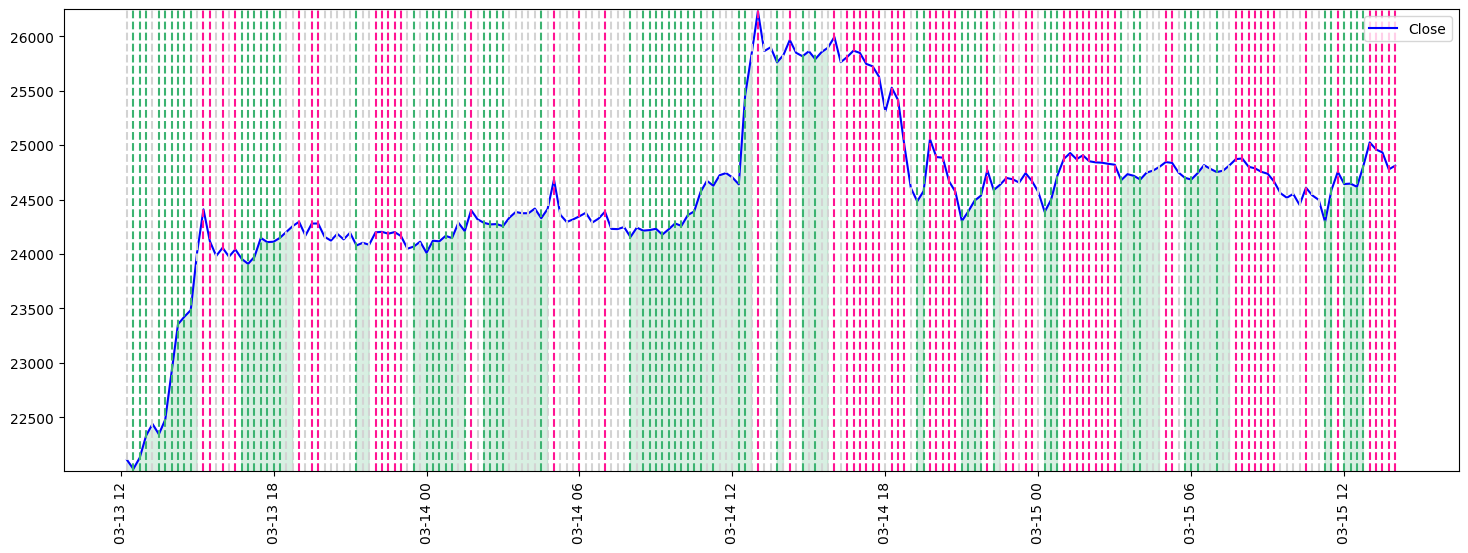

In [128]:
df_v = df.iloc[1200:1400,:]

import matplotlib.pyplot as plt

# Şekil oluşturma
plt.figure(figsize=(18, 6))

# X ekseni için tarihleri düzgün şekilde görüntülemek için x ekseni etiketlerini dik yapalım
plt.xticks(rotation=90)

# 'In/Out' sütunu 1 ise grafiğin arka planını mediumseagreen rengine boya ve alpha değerini (saydamlık) = 0.1 ver
# Sütun 0 ise, arka planı deeppink rengine boya ve alpha değerini = 0.1 ver



# Grafik çizimi
plt.plot(df_v['timestamp'], df_v['close'], label='Close', color='blue')

y_min = df_v['close'].min() - 20
y_max = df_v['close'].max() + 20

plt.ylim(y_min, y_max)

background_in = df_v['In/Out'] == 1

plt.fill_between(df_v['timestamp'], df_v['close'], where=background_in, color='mediumseagreen', alpha=0.2)

# Bear, Volatile ve Bull sütunlarını dikkate alarak renkleri ayarlayalım
for i, row in df_v.iterrows():
    if row['Sell'] == 1:
        plt.axvline(x=row['timestamp'], color='deeppink', linestyle='--')
    if row['Stable'] == 1:
        plt.axvline(x=row['timestamp'], color='lightgray', linestyle='--')
    if row['Buy'] == 1:
        plt.axvline(x=row['timestamp'], color='mediumseagreen', linestyle='--')

plt.legend()
plt.show()


In [129]:
df[(df['In/Out'] == 0) & (df['Sell'] == 1)]

,timestamp,open,high,low,close,Sell,Stable,Buy,In/Out,change
34,2023-03-01 08:45:00,23757.97,24000.00,23745.19,23867.78,1,0,0,0,0.460076
35,2023-03-01 09:00:00,23869.01,23907.68,23801.64,23854.07,1,0,0,0,-0.057474
36,2023-03-01 09:15:00,23854.07,23854.84,23754.50,23788.14,1,0,0,0,-0.277155
37,2023-03-01 09:30:00,23786.79,23816.69,23746.00,23757.05,1,0,0,0,-0.130866
38,2023-03-01 09:45:00,23757.77,23780.98,23725.07,23756.14,1,0,0,0,-0.003831
...,...,...,...,...,...,...,...,...,...,...
17633,2023-08-31 17:45:00,26341.68,26346.89,26286.35,26329.07,1,0,0,0,-0.047856
17634,2023-08-31 18:00:00,26329.08,26387.32,26300.00,26364.28,1,0,0,0,0.133552
17635,2023-08-31 18:15:00,26364.28,26364.29,26301.17,26310.13,1,0,0,0,-0.205814
17637,2023-08-31 18:45:00,26257.93,26330.00,26189.77,26292.23,1,0,0,0,0.130457


**Bear/Volatile/Bull Value Counts For Fine Tune (through 3 hours looking for %0.5 profit):**

![Alt text](image-1.png)

**Bear/Volatile/Bull Value Counts For Medium Tune (through 8 hours looking for %1 profit)**

In [130]:
df[['Buy', 'Stable', 'Sell']].value_counts()

Buy  Stable  Sell
0    1       0       5785
     0       1       4635
1    0       0       4577
0    0       0       2662
dtype: int64

In [131]:
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import MACD

# Calculate RSI
rsi_period = 14
df['rsi'] = RSIIndicator(df['close'], rsi_period).rsi()

# Calculate MACD
macd_fast_period = 12
macd_slow_period = 26
macd_signal_period = 9
macd = MACD(df['close'], window_fast=macd_fast_period, window_slow=macd_slow_period, window_sign=macd_signal_period)
df['macd'] = macd.macd()
df['macd_signal'] = macd.macd_signal()
df['macd_histogram'] = macd.macd_diff()

# Calculate Bollinger Bands
bollinger_period = 20
bollinger_bands = BollingerBands(df['close'], bollinger_period)
df['bb_upper'], df['bb_middle'], df['bb_lower'] = bollinger_bands.bollinger_hband(), bollinger_bands.bollinger_mavg(), bollinger_bands.bollinger_lband()


C:\Users\anerg\AppData\Local\Temp\ipykernel_6360\708124327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = RSIIndicator(df['close'], rsi_period).rsi()
C:\Users\anerg\AppData\Local\Temp\ipykernel_6360\708124327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['macd'] = macd.macd()
C:\Users\anerg\AppData\Local\Temp\ipykernel_6360\708124327.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [132]:
df = df.iloc[52:, :]

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,17607.0,27841.976141,2243.973242,19622.770000,26722.475000,28029.160000,29453.835000,31672.950000
high,17607.0,27878.302467,2241.294918,19687.730000,26754.065000,28072.010000,29477.630000,31804.200000
low,17607.0,27803.744010,2246.134114,19549.090000,26686.020000,27985.000000,29435.020000,31632.000000
close,17607.0,27842.108071,2243.796768,19621.660000,26722.475000,28029.120000,29453.835000,31672.950000
Sell,17607.0,0.262566,0.440041,0.000000,0.000000,0.000000,1.000000,1.000000
Stable,17607.0,0.327881,0.469455,0.000000,0.000000,0.000000,1.000000,1.000000
Buy,17607.0,0.258420,0.437778,0.000000,0.000000,0.000000,1.000000,1.000000
In/Out,17607.0,0.373772,0.483818,0.000000,0.000000,0.000000,1.000000,1.000000
rsi,17607.0,49.871808,11.036106,4.480197,43.188074,49.548066,56.092790,94.539467
macd,17607.0,1.018808,71.108320,-489.495876,-23.129778,-1.672670,19.931569,517.372616


In [134]:
df.to_csv('binance_api_15min_RSI-BB-MACD.csv', index=False)